# Concentration de CO2 dans l'atmosphère depuis 1958

Date de téléchargement des données du "Keeling Curve" (weekly) : 11/11/2024

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
from sklearn.linear_model import LinearRegression
import numpy as np





In [2]:
raw_data = pd.read_csv("weekly_in_situ_co2_mlo.csv",skiprows=44,names=["date", "CO2"], parse_dates=["date"])
raw_data = raw_data.set_index("date")
raw_data

CO2
date              
1958-03-29  316.19
1958-04-05  317.31
1958-04-12  317.69
1958-04-19  317.58
1958-04-26  316.48
1958-05-03  316.95
1958-05-17  317.56
1958-05-24  317.99
1958-07-05  315.85
1958-07-12  315.85
1958-07-19  315.46
1958-07-26  315.59
1958-08-02  315.64
1958-08-09  315.10
1958-08-16  315.09
1958-08-30  314.14
1958-09-06  313.54
1958-11-08  313.05
1958-11-15  313.26
1958-11-22  313.57
1958-11-29  314.01
1958-12-06  314.56
1958-12-13  314.41
1958-12-20  314.77
1958-12-27  315.21
1959-01-03  315.24
1959-01-10  315.50
1959-01-17  315.69
1959-01-24  315.86
1959-01-31  315.42
...            ...
2024-03-09  425.09
2024-03-16  425.71
2024-03-23  425.94
2024-03-30  425.02
2024-04-06  425.99
2024-04-13  425.43
2024-04-20  426.91
2024-04-27  427.13
2024-05-04  426.51
2024-05-11  427.20
2024-05-18  426.26
2024-05-25  426.68
2024-06-01  426.78
2024-06-08  427.01
2024-06-15  427.10
2024-06-22  426.54
2024-06-29  425.41
2024-07-06  425.73
2024-07-13  426.10
2024-07-20  424.36
2024-07-27  424.72
2024-08-03  424.42
2024-08-10  422.50
2024-08-17  422.80
2024-08-24  421.45
2024-08-31  421.57
2024-09-07  421.81
2024-09-14  421.39
2024-09-21  421.77
2024-09-28  421.51

[3397 rows x 1 columns]

On a bel et bien une oscillation périodique superposée à une évolution systématique plus lente.

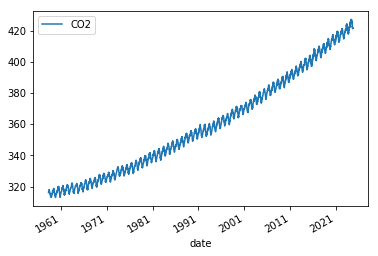

In [3]:
raw_data.plot()

Caractérisation de l'évolution lente en faisant une moyenne mobile sur 25 semaines.

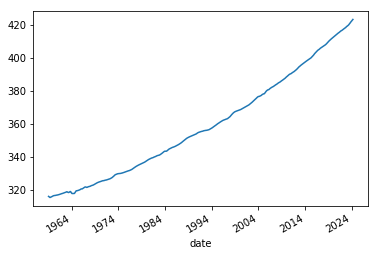

In [4]:
raw_data['evolLente'] = raw_data['CO2'].rolling(window=52, center=True).mean()
raw_data['evolLente'].plot()

Caractérisation de l'oscillation periodique en soustrayant la tendance lente des données d'origine.

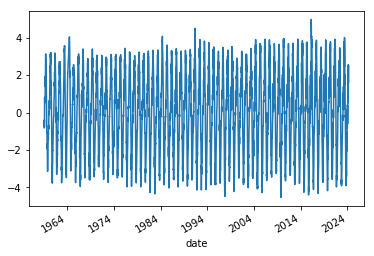

In [5]:
raw_data['OscilPer'] = raw_data['CO2'] - raw_data['evolLente']
raw_data['OscilPer'].plot()

On enlève les données CO2 qui valent Naan.

In [6]:
data_trend = raw_data.dropna(subset=['evolLente'])

On convertit la date en jours pour la régression.

In [7]:
X = np.array((data_trend.index - data_trend.index[0]).days).reshape(-1, 1) 
y = data_trend['evolLente'].values

In [8]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

On met en place les prédictions jusqu'à fin 2025.

In [9]:
future_dates = pd.date_range(start=data_trend.index[0], end='2025-12-31', freq='W')
X_future = np.array((future_dates - data_trend.index[0]).days).reshape(-1, 1)
trend_future = model.predict(X_future)

On ajoute à raw_data les nouvelles données.

In [10]:

trend_df = pd.DataFrame({'Tendance_Prédite': trend_future}, index=future_dates)
projec_data = raw_data.join(trend_df, how='outer')


Mis en place de l'affichage.

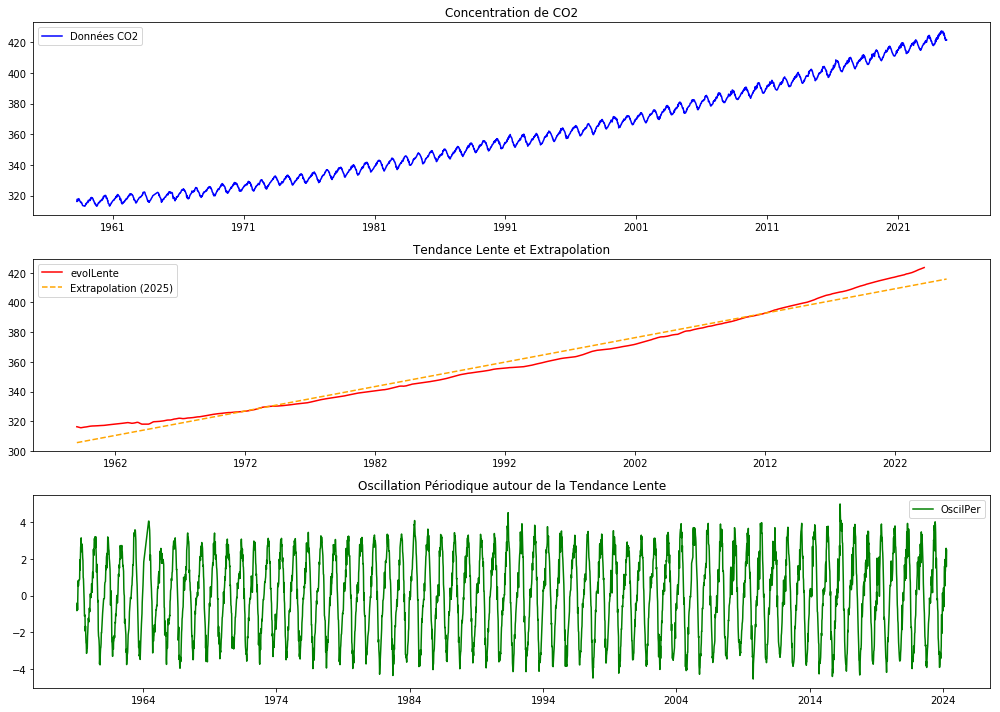

In [11]:
plt.figure(figsize=(14, 10))


plt.subplot(3, 1, 1)
plt.plot(raw_data.index, raw_data['CO2'], color='blue', label='Données CO2')
plt.title('Concentration de CO2')
plt.legend()


plt.subplot(3, 1, 2)
plt.plot(data_trend.index, data_trend['evolLente'], color='red', label='evolLente')
plt.plot(trend_df.index, trend_df['Tendance_Prédite'], color='orange', linestyle='--', label='Extrapolation (2025)')
plt.title('Tendance Lente et Extrapolation')
plt.legend()


plt.subplot(3, 1, 3)
plt.plot(raw_data.index, raw_data['OscilPer'], color='green', label='OscilPer')
plt.title('Oscillation Périodique autour de la Tendance Lente')
plt.legend()

plt.tight_layout()
plt.show()